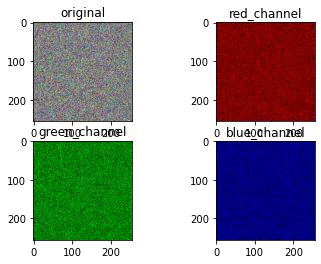

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import time
from copy import deepcopy
from PIL import Image
from IPython import display
import cv2





cipher_lena = io.imread('F:/Thesis/cipher_lena256.png')
red_channel= deepcopy(cipher_lena)
green_channel=deepcopy(cipher_lena)
blue_channel=deepcopy(cipher_lena)

red_channel[:,:,1]=0
red_channel[:,:,2]=0

green_channel[:,:,0]=0
green_channel[:,:,2]=0

blue_channel[:,:,0]=0
blue_channel[:,:,1]=0

fig, ax=plt.subplots(ncols=2,nrows=2)

ax[0,0].imshow(cipher_lena)
ax[0,0].set_title('original')


ax[0,1].imshow(red_channel)
ax[0,1].set_title('red_channel')


ax[1,0].imshow(green_channel)
ax[1,0].set_title('green_channel')


ax[1,1].imshow(blue_channel)
ax[1,1].set_title('blue_channel')


plt.show()

In [11]:
import numpy as np
start = time.time()
# # Create a 3D array of shape (height, width, 3) representing an RGB image
# image = np.random.randint(0, 256, (100, 100, 3))

# Split the 3D array into separate 2D arrays for each color component
cipher_red_matrix = cipher_lena[:, :, 0]
cipher_green_matrix = cipher_lena[:, :, 1]
cipher_blue_matrix = cipher_lena[:, :, 2]

# Print the matrices
# print('original')
# print(cipher_lena)
# print("Red matrix:")
# print(cipher_red_matrix)

# print("Green matrix:")
# print(cipher_green_matrix)

# print("Blue matrix:")
# print(cipher_blue_matrix)

# print(type(cipher_blue_matrix))

In [12]:
cipher_red_1D=np.array(cipher_red_matrix).flatten()
# print(cipher_red_1D)

cipher_green_1D=np.array(cipher_green_matrix).flatten()
# print(cipher_green_1D)

cipher_blue_1D=np.array(cipher_blue_matrix).flatten()
# print(cipher_blue_1D)

sizes=len(cipher_red_1D)
# print(sizes)
# print(type(cipher_red_1D))

# print('-------------------------')
# print(max(cipher_blue_1D))
# print(min(cipher_blue_1D))
# print(cipher_blue_1D.tolist())

In [13]:
cipher_red_prime=np.bitwise_xor(cipher_red_1D, cipher_green_1D)

# print('single xored red')
# print(cipher_red_prime)


cipher_green_prime=np.bitwise_xor( cipher_red_1D, cipher_blue_1D)
# print('single xored green')
# print(cipher_green_prime)

cipher_blue_prime=np.bitwise_xor( cipher_red_1D, np.bitwise_xor(cipher_green_1D, cipher_blue_1D))
# print('single xored blue')
# print(cipher_blue_prime)
# print(len(cipher_red_prime))

# print(cipher_blue_prime.tolist())

In [14]:
def tent_map_mu(x, mu):
    if x < 0.5:
        return (4*(9-mu)*x*(1-x))/9 + (2*mu*x)/9
    else:
        return (4*(9-mu)*x*(1-x))/9 + (2*mu*(1-x))/9
    


def tent_logistic_system_mu(x_0, mu, n):
    x = x_0
    values = []
    for i in range(L-n):
        x = tent_map_mu(x, mu)
        y = int(x * 10**14)% 256
        values.append(y)
    return np.array(values)   
     

# x_0 = 0.1  # initial value
# mu = 3.8  # parameter value
# n = 88  # number of iterations
L=600


 


cipher_random_seq_1=tent_logistic_system_mu(0.1,3.8,88)
# print('random seq for red component')
# print(cipher_random_seq_1)


cipher_random_seq_2=tent_logistic_system_mu(0.2,4.2,88)
# print('random seq for green component')
# print(cipher_random_seq_2)



cipher_random_seq_3=tent_logistic_system_mu(0.16,3.1,88)
# print('random seq for blue component')
# print(cipher_random_seq_3)

In [15]:
def xor_matrices(seq, comp):
    result = []
    num_rows = comp.shape[0]
    seq_length = len(seq)
    for i in range(len(comp)):
        result.append(seq[i%seq_length] ^ comp[i])
    return result

cipher_red_matrix_main =xor_matrices(cipher_random_seq_1,cipher_red_prime)   
# print('cipher red matrix main')
# print(cipher_red_matrix_main )


 

cipher_green_matrix_main =xor_matrices(cipher_random_seq_2,cipher_green_prime) 
# print('cipher green matrix main')
# print(cipher_green_matrix_main )



 
cipher_blue_matrix_main =xor_matrices(cipher_random_seq_3,cipher_blue_prime) 
# print('cipher blue matrix main')
# print(cipher_blue_matrix_main )
# print(max(cipher_red_matrix_main))

In [16]:



import math

length = len(cipher_red_matrix_main)
rows = int(math.sqrt(length))
cols = int(math.sqrt(length))
arr_2d_red = np.array(cipher_red_matrix_main).reshape(rows, cols)
arr_2d_green = np.array(cipher_green_matrix_main).reshape(rows, cols)
arr_2d_blue = np.array(cipher_blue_matrix_main).reshape(rows, cols)

# print(type(arr_2d_blue))
# print('2d red')
# print(arr_2d_red)
# print('2d green')
# print(arr_2d_green)

# print('2d blue')
# print(arr_2d_blue)
# print(arr_2d_blue.tolist())


In [17]:

#----------------------------------


import numpy as np
import random
import math

# def logistic_map(x, r):
#     return r * x * (1 - x)
def piecewise_linear_map(xn, m):
    if 0 <= xn < m:
        return xn/m
    elif m <= xn < 0.5:
        return (xn-m)/(0.5-m)
    elif 0.5 < xn < 1-m:
        return (1-m-xn)/(0.5-m)
    else:
        return (1-xn)/m
def initial_sbox_generation(m):
    sbox = []
    x = 0.76
    for i in range(256):
        x = piecewise_linear_map(x, m)
        sbox.append(int(round(x * 256)))
    return sbox


def gray_wolf_optimization(sbox, max_iterations):
    best_position = np.zeros(256)
    best_position = np.around(best_position).astype(int)
    for i in range(max_iterations):
        for j in range(256):
            random_position = random.randint(0, 255)
            obj_value = sbox[j]
            if obj_value > best_position[j]:
                best_position[j] = obj_value
        sorted_indices = np.argsort(best_position)[::-1][:256]
    return sorted_indices


def generate_sbox(m, max_iterations):
    sbox = initial_sbox_generation(m)
    final_sbox = []
    unique_values = 0
    while unique_values < 256:
        current_iteration_sbox = gray_wolf_optimization(sbox, max_iterations)
        for value in current_iteration_sbox:
            if value not in final_sbox and unique_values < 256:
                final_sbox.append(value)
                unique_values += 1
    return final_sbox



# Example usage
S = generate_sbox(0.15, 2000)
print(S)

[226, 74, 26, 28, 186, 128, 146, 33, 168, 22, 116, 198, 206, 69, 7, 142, 189, 172, 135, 220, 196, 140, 175, 82, 251, 209, 214, 222, 110, 154, 86, 132, 57, 78, 202, 137, 138, 20, 166, 201, 174, 109, 139, 167, 185, 21, 3, 203, 157, 89, 60, 163, 79, 58, 84, 52, 63, 97, 47, 43, 119, 13, 177, 239, 191, 93, 247, 231, 113, 151, 236, 9, 11, 254, 107, 144, 31, 224, 72, 133, 218, 212, 87, 183, 155, 50, 111, 234, 252, 210, 216, 215, 211, 217, 223, 71, 106, 253, 235, 112, 150, 238, 176, 46, 83, 51, 88, 156, 184, 153, 213, 81, 219, 134, 6, 141, 115, 25, 73, 225, 32, 145, 197, 171, 195, 221, 208, 250, 77, 56, 108, 19, 173, 200, 165, 136, 255, 2, 62, 96, 42, 118, 12, 190, 92, 230, 8, 10, 143, 182, 233, 105, 70, 149, 237, 152, 114, 24, 194, 170, 249, 207, 199, 76, 1, 41, 95, 91, 117, 232, 148, 23, 193, 169, 0, 248, 40, 94, 147, 192, 39, 38, 36, 37, 34, 35, 124, 100, 159, 14, 178, 101, 240, 160, 129, 125, 102, 179, 241, 120, 15, 187, 126, 130, 161, 29, 48, 44, 180, 228, 103, 64, 98, 66, 242, 244, 121, 

In [18]:
import numpy as np

def reverse_replace(arr2D, arr1D):
    arr2D = np.array(arr2D)
    arr1D = np.array(arr1D)
    arr2D = np.vectorize(lambda x: np.where(arr1D == x)[0][0])(arr2D)
    return arr2D

cipher_red_matrix_1 = reverse_replace(arr_2d_red, S)
cipher_green_matrix_1 = reverse_replace(arr_2d_green, S)
cipher_blue_matrix_1 = reverse_replace(arr_2d_blue, S)

# print(cipher_blue_matrix_1.tolist())

# print('red')
# print(cipher_red_matrix_1)
# print('green')

# print(cipher_green_matrix_1)
# print('blue')
# print(cipher_blue_matrix_1)


In [19]:

original_image= np.stack([cipher_red_matrix_1, cipher_green_matrix_1, cipher_blue_matrix_1], axis=2)
# print(original_image)


In [20]:
from PIL import Image
main_image = Image.fromarray(original_image.astype('uint8'), 'RGB')
main_image.save("F:\Thesis\decrypted_lena256.png")

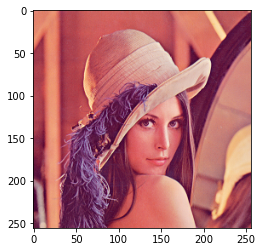

In [21]:
plt.imshow(main_image)
plt.show()

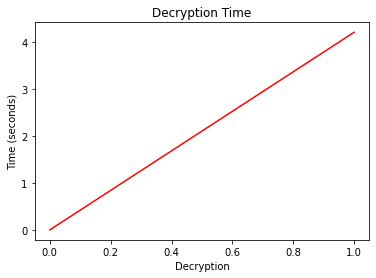

In [22]:
end = time.time()

total_time = end - start

# Plot time using Matplotlib
plt.plot([0, 1], [0, total_time], 'r')
plt.xlabel('Decryption')
plt.ylabel('Time (seconds)')
plt.title('Decryption Time')
plt.show()

In [23]:
           #decryption end
    # ---------------------------